In [1]:
%load_ext zipline

In [9]:
from zipline.api import *
from zipline.algorithm import *
import zipline
# from plotly.offline import init_notebook_mode , plot , iplot , download_plotlyjs
import pandas as pd
import numpy as np
# import plotly as py
# import cufflinks as cf
# import pyfolio as pf
from datetime import datetime
# init_notebook_mode(connected=True)
# cf.go_offline()
import matplotlib.pyplot as pt 
from matplotlib import style
style.use('ggplot')

In [16]:
def initialize(context):
    '''初始化證券池'''
#     set_benchmark(symbol('AAPL'))
    context.security = [symbol('AAPL'),symbol('AMZN'),symbol('GOOGL'),symbol('EBAY'),symbol('ACTG')]
    schedule_function(ma_crossover_handling,
                      date_rules.every_day(),
                      time_rules.market_open(hours = 1)
                     )
    
def ma_crossover_handling(context , data):
    lo = 20
    sh = 5
    for st in context.security :
        h = data.history(st ,
                            'price' , lo ,
                            '1d' )
        long = h.mean()
        short = h[-sh:].mean()
        '''前面20 到現在進行計算均值 '''
        
        open_orders = get_open_orders()
        ct = 0 
        if short > long:
            if st not in open_orders:
                order_target_percent(st , 0.33 )
                ct +=1
                log.info('buy')
        elif long > short :
            if st in open_orders:
                order_target_percent(st , -0.33 )
                log.info('sell')
                ct -=1
    record(ct = ct , long = long , short = short )
    
def analyze(context , pref ):
#     print('initialize cash %s '%str(pref.starting_cash[-1]))
#     print('max_drawdown ' + str(pref.max_drawdown.mean()) + '%' )
#     print('portfolio_value %s'%pref.portfolio_value[-1])
#     print('beta -> %s'%pref.beta.dropna().mean())
#     print('sharpe -> %s'%pref.sharpe.mean())
#     print('max drawdown -> ' + str( pref.max_drawdown.mean() ) + '%') 
#     print('alpha -> %s '%pref.alpha.mean())
    returns , positions , transactions = pf.utils.extract_rets_pos_txn_from_zipline(pref)
    pf.create_returns_tear_sheet(returns , benchmark_rets = None)
#     pref[['benchmark_period_return','algorithm_period_return']].iplot(title='strategy return')
#     pref['returns'].iplot(title='return')
    pt.show()
#     pref['returns'].iplot()

Start date,2015-01-05
End date,2018-01-04
Total months,36
,Backtest
Annual return,28.7%
Cumulative returns,113.2%
Annual volatility,44.0%
Sharpe ratio,0.79
Calmar ratio,0.60
Stability,0.48
Max drawdown,-47.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,47.43,2015-07-17,2016-02-10,2017-02-01,404
1,38.79,2017-08-16,2017-09-26,2017-11-09,62
2,13.54,2015-04-24,2015-07-08,2015-07-17,61
3,12.64,2017-11-13,2017-11-28,2018-01-02,37
4,11.72,2015-03-02,2015-04-17,2015-04-24,40


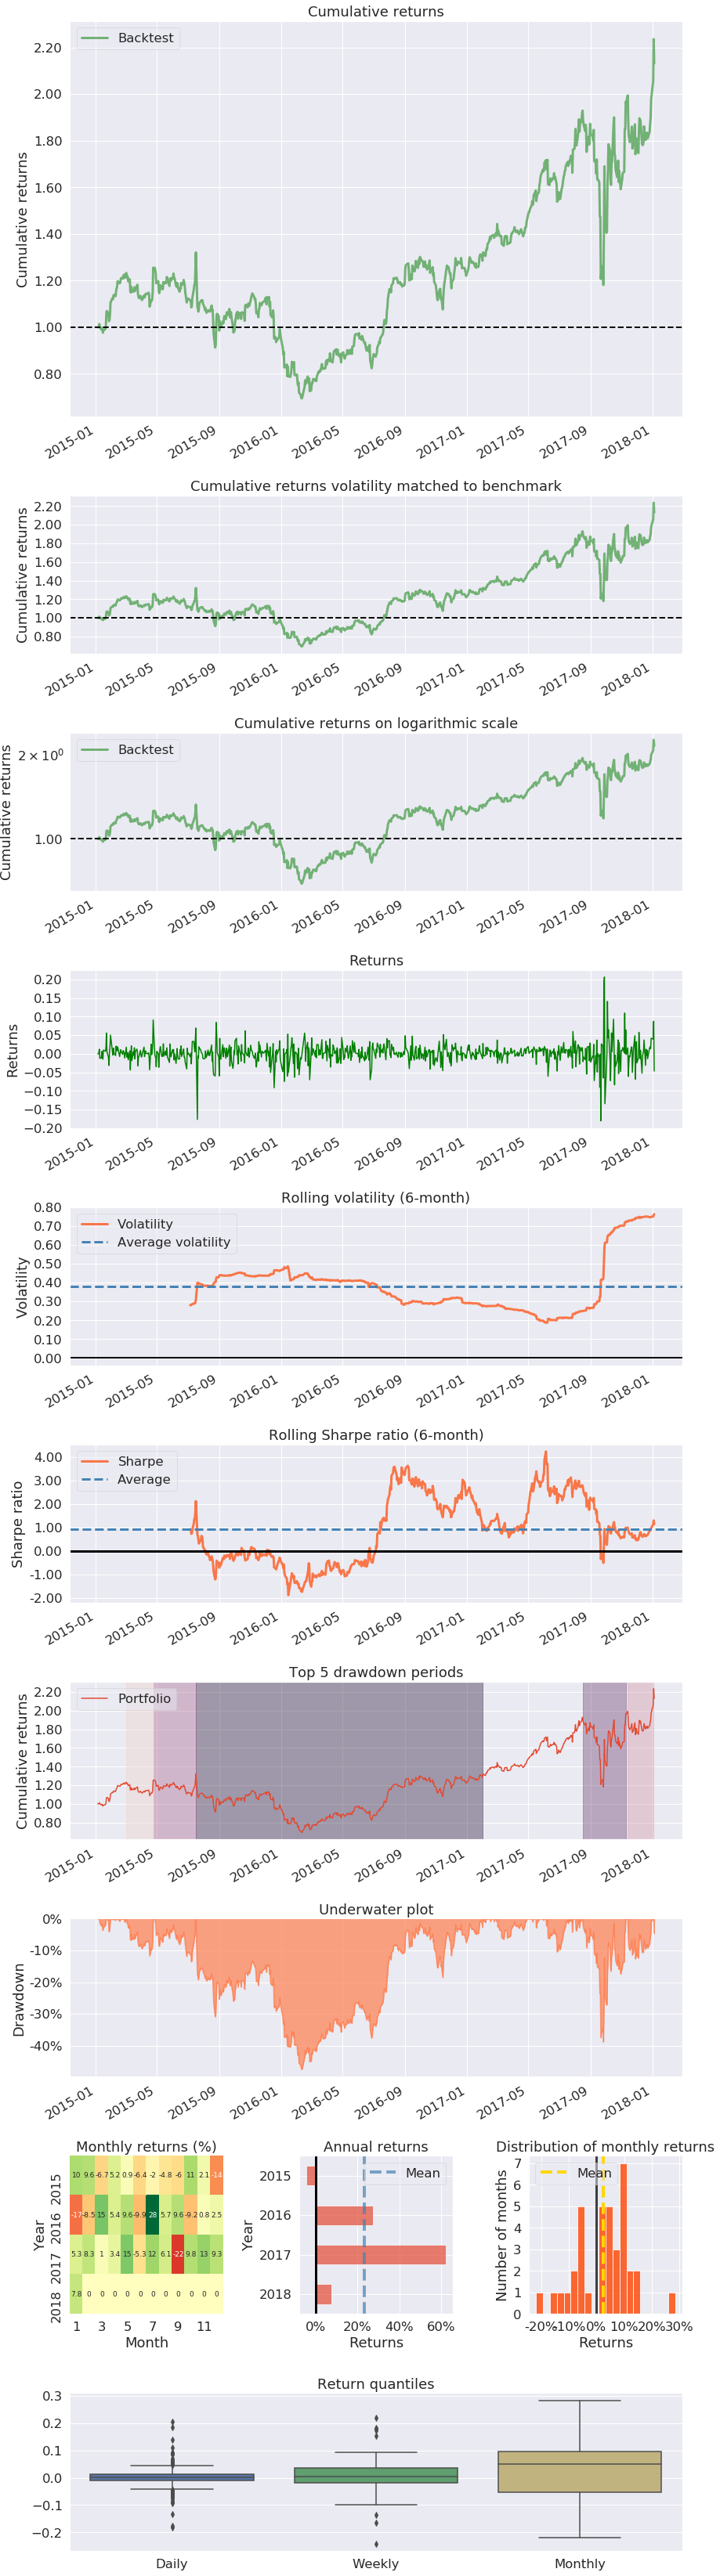

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ct,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-01-05 00:00:00+00:00,NaN,0.000000,NaN,-0.009419,NaN,NaN,0.000000e+00,0,1.000000e+07,0.000000e+00,...,0.000000e+00,0.000000e+00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,1,[],0.0
2015-01-06 00:00:00+00:00,0.005530,-0.000493,NaN,-0.018749,0.000000,NaN,-9.705295e+06,0,2.947051e+05,9.700368e+06,...,0.000000e+00,0.000000e+00,0,-11.224972,1.000000e+07,0.000000e+00,0.000000e+00,2,"[{'commission': None, 'price': 55.04751, 'dt':...",0.0
2015-01-07 00:00:00+00:00,0.020112,0.001413,0.171437,-0.006522,0.200535,0.098380,-7.434398e+04,0,2.203611e+05,9.793765e+06,...,0.000000e+00,0.000000e+00,0,26.296839,2.947051e+05,9.700368e+06,9.700368e+06,3,"[{'commission': None, 'price': 298.56921, 'dt'...",0.0
2015-01-08 00:00:00+00:00,0.094310,0.013601,0.616350,0.011108,0.227342,0.334427,0.000000e+00,0,2.203611e+05,9.915653e+06,...,0.000000e+00,0.000000e+00,0,218.868395,2.203611e+05,9.793765e+06,9.793765e+06,4,[],0.0
2015-01-09 00:00:00+00:00,0.138303,0.001109,-0.018057,0.003005,0.211430,0.482411,0.000000e+00,0,2.203611e+05,9.790726e+06,...,0.000000e+00,0.000000e+00,0,0.725218,2.203611e+05,9.915653e+06,9.915653e+06,5,[],0.0
2015-01-12 00:00:00+00:00,0.143674,-0.009927,-0.306909,-0.004852,0.196977,0.548447,0.000000e+00,0,2.203611e+05,9.680365e+06,...,0.000000e+00,0.000000e+00,0,-3.824933,2.203611e+05,9.790726e+06,9.790726e+06,6,[],0.0
2015-01-13 00:00:00+00:00,0.139677,-0.003612,0.016620,-0.007651,0.180241,0.527521,0.000000e+00,0,2.203611e+05,9.743522e+06,...,0.000000e+00,0.000000e+00,0,-1.227619,2.203611e+05,9.680365e+06,9.680365e+06,7,[],0.0
2015-01-14 00:00:00+00:00,0.132407,-0.009143,-0.054393,-0.013642,0.169210,0.540890,0.000000e+00,0,2.203611e+05,9.688208e+06,...,0.000000e+00,0.000000e+00,0,-2.874203,2.203611e+05,9.743522e+06,9.743522e+06,8,[],0.0
2015-01-15 00:00:00+00:00,0.142890,-0.023593,-0.271234,-0.022678,0.163174,0.615074,-3.182613e+06,0,-2.962252e+06,1.272632e+07,...,0.000000e+00,0.000000e+00,0,-5.472574,2.203611e+05,9.688208e+06,9.688208e+06,9,"[{'commission': None, 'price': 106.87341, 'dt'...",0.0
2015-01-16 00:00:00+00:00,0.148660,-0.013919,-0.188601,-0.009861,0.172657,0.653587,0.000000e+00,0,-2.962252e+06,1.282306e+07,...,0.000000e+00,0.000000e+00,0,-3.004648,-2.962252e+06,1.272632e+07,1.272632e+07,10,[],0.0


limit_output extension: Maximum message size of 10000 exceeded with 39526 characters

In [17]:
%zipline --bundle quantopian-quandl --start 2015-1-4 --end 2018-1-4